<a href="https://colab.research.google.com/github/Musavvir25/cseEdge/blob/main/Musavvir%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   Density (g/cm³)  Formation Energy (eV/atom)  Atomic Volume (Å³)  \
0             2.65                       -3.45               10.12   
1             3.10                       -2.85               12.54   
2             4.50                       -5.20                8.30   
3             3.80                       -4.10               11.00   
4             2.90                       -3.00                9.85   

   Number of Elements  Bandgap (eV)  
0                   2           1.1  
1                   3           2.0  
2                   1           0.5  
3                   2           1.8  
4                   3           1.2  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2730 - mae: 0.9298 - val_loss: 2.1795 - val_mae: 1.4622
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 1.1903 - mae: 0.9014 - val_loss: 2.1167 - val_mae: 1.4393
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.1136 - mae: 0.8727 - val_loss: 2.0536 - val_mae: 1.4156
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.0415 - mae: 0.8432 - val_loss: 1.9896 - val_mae: 1.3909
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.9709 - mae: 0.8118 - val_loss: 1.9278 - val_mae: 1.3664
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.9047 - mae: 0.7798 - val_loss: 1.8688 - val_mae: 1.3422
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.8444 - mae: 0.7532 - val_loss: 1.8128 - val_mae: 1.3184
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7874 - mae: 0.7335 - val_loss: 1.7594 - val_mae: 1.2950
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7331 - mae: 0.7115 - v

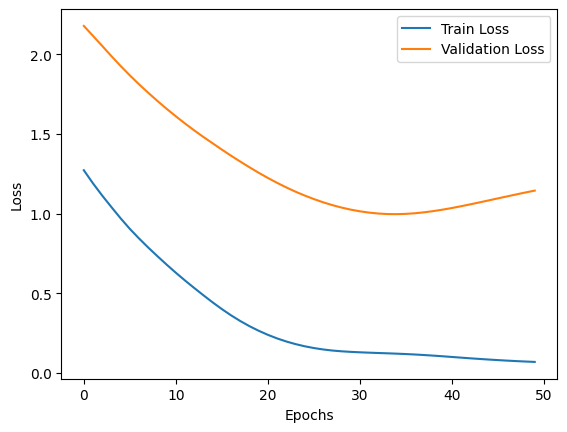

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Bandgap Values: [0.7596227 2.120617 ]
True Bandgap Values: [1.6 2. ]


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('materials_data.csv')  # Replace with your file path
print("Dataset Head:")
print(data.head())

# Step 2: Split into features and target variable
X = data[['Density (g/cm³)', 'Formation Energy (eV/atom)', 'Atomic Volume (Å³)', 'Number of Elements']].values
y = data['Bandgap (eV)'].values

# Step 3: Preprocess data (normalize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build the neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Step 7: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Step 8: Visualize training performance
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 9: Make predictions
predictions = model.predict(X_test)
print(f"Predicted Bandgap Values: {predictions[:5].flatten()}")
print(f"True Bandgap Values: {y_test[:5]}")
